# Daniel Zhang Project

# Table of Contents
<a href = '#section1'> A link to Data Information </a>

<a href = '#section2'> A link to Visualization </a>

<a href = '#section3'> A link to Exploratory Analysis </a>

<a href = '#section4'> A link to Feature Selection </a>

<a href = '#section5'> A link to Evaluation </a>

<a href = '#section5'> A link to Conlusion </a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
import graphviz 
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

<a id = 'section1'> </a>
# Data Information 

In [2]:
diabetes = pd.read_csv('diabetes.csv')

In [3]:
diabetes.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [4]:
diabetes.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
insu     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null object
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [6]:
#Replacing class variable with binary values

diabetes = diabetes.replace('tested_positive', 1)
diabetes = diabetes.replace('tested_negative', 0)
diabetes

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Visualization for Classification Data

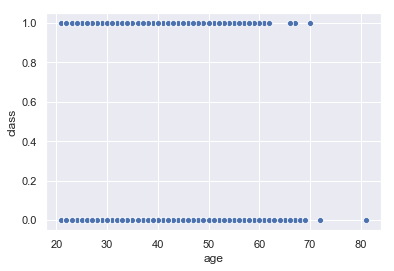

In [7]:
sns.set()
sns.scatterplot(x = 'age', y = 'class', data = diabetes)

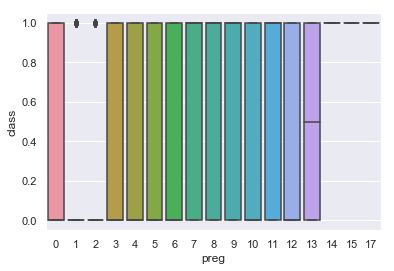

In [8]:
sns.boxplot(x="preg", y="class", data=diabetes);

# Exploratory Analysis

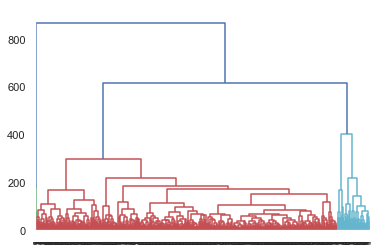

In [9]:
val = diabetes.values
mergings = linkage(val, method='complete')
classes = list(diabetes['class'])

dendrogram(mergings,
           labels=classes,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()


In [10]:
kmeansModel = KMeans(n_clusters=3)
kmeansModel.fit(diabetes)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
kmeansModel.cluster_centers_

array([[3.52765957e+00, 1.29327660e+02, 7.14468085e+01, 3.03063830e+01,
        1.59102128e+02, 3.39893617e+01, 5.40276596e-01, 3.19021277e+01,
        4.17021277e-01],
       [4.02631579e+00, 1.58447368e+02, 7.20000000e+01, 3.22631579e+01,
        4.41289474e+02, 3.51078947e+01, 5.69210526e-01, 3.47631579e+01,
        5.78947368e-01],
       [3.98181818e+00, 1.14008081e+02, 6.77717172e+01, 1.49979798e+01,
        1.44000000e+01, 3.08054545e+01, 4.31931313e-01, 3.37595960e+01,
        2.98989899e-01]])

In [12]:
kmeansModel.labels_

array([2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 1,
       2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2,
       0, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2,
       1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0,
       1, 0, 2, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 2, 2,

Text(0.5, 1.0, 'Actual Clusters')

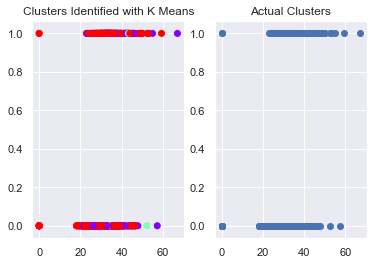

In [13]:
plt.subplot(1, 2, 1)
plt.scatter(diabetes['mass'],diabetes['class'],c=kmeansModel.labels_,cmap='rainbow')
plt.title('Clusters Identified with K Means')


plt.subplot(1, 2, 2)
plt.scatter(diabetes['mass'],diabetes['class'],cmap='rainbow')
plt.title("Actual Clusters")

# Feature Selection

In [14]:
logit=LogisticRegression(multi_class='ovr',solver='lbfgs')

rfecv = RFECV(estimator=logit, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(diabetes.drop(columns = ['class']), diabetes['class'].values)

C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

Optimal number of features : 8


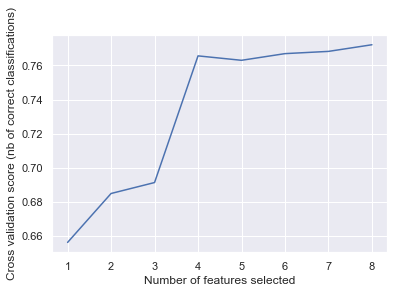

In [15]:
print(f"Optimal number of features : {rfecv.n_features_}")
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# Evaluation

# Decision Tree Classifier

In [16]:
y = diabetes['class'].values
X = diabetes.drop(columns = ['class']).values

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)

In [17]:
dtree = DecisionTreeClassifier(criterion='entropy')

dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
predictions = dtree.predict(X_test)

In [19]:
print(confusion_matrix(y_test,predictions))

[[113  37]
 [ 34  47]]


# Random Forest

In [20]:
rfc = RandomForestClassifier(n_estimators=600)

In [21]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
predictions = rfc.predict(X_test)

In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       150
           1       0.61      0.57      0.59        81

   micro avg       0.72      0.72      0.72       231
   macro avg       0.69      0.68      0.69       231
weighted avg       0.71      0.72      0.72       231



# KNN and CV

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7359307359307359


In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.67532468 0.79220779 0.71428571 0.67532468 0.66233766 0.74025974
 0.7012987  0.79220779 0.71052632 0.75      ]


In [26]:
mse_scores = scores
print("Mean Squared Error:")
print(mse_scores)
print('\n')

rmse_scores = np.sqrt(mse_scores)
print("Root mean Squared Error:")
print(rmse_scores)
print('\n')

print("Average root mean Squared Error:")
print(rmse_scores.mean())

Mean Squared Error:
[0.67532468 0.79220779 0.71428571 0.67532468 0.66233766 0.74025974
 0.7012987  0.79220779 0.71052632 0.75      ]


Root mean Squared Error:
[0.8217814  0.89006056 0.84515425 0.8217814  0.8138413  0.86038348
 0.83743579 0.89006056 0.84292723 0.8660254 ]


Average root mean Squared Error:
0.8489451381122054


In [27]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.6796650717703349, 0.7122351332877648, 0.7030587833219413, 0.7187115516062884, 0.7213773069036227, 0.7357142857142858, 0.7396274777853726, 0.7383116883116883, 0.7383458646616542, 0.7434723171565277, 0.7369446343130555, 0.7473684210526316, 0.7422077922077922, 0.7539131920710869, 0.7448051948051948, 0.7526144907723855, 0.7552973342447027, 0.7552802460697198, 0.7474709501025291, 0.7461893369788107, 0.7500683526999316, 0.7501196172248804, 0.7475222146274778, 0.7435919343814081, 0.7462064251537937, 0.7331681476418319, 0.7370813397129188, 0.7305365686944635, 0.7318523581681476, 0.7253588516746412]


Text(0, 0.5, 'Cross-Validated Accuracy')

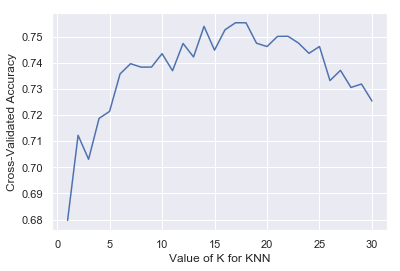

In [28]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [29]:
knn = KNeighborsClassifier(n_neighbors=14)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.7539131920710869


In [30]:
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())
scores = cross_val_score(logreg, X, y, cv=10, scoring='neg_mean_squared_error')

0.7669685577580314


C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [31]:
mse_scores = -scores
print("Mean Squared Error:")
print(mse_scores)
print('\n')

rmse_scores = np.sqrt(mse_scores)
print("Root mean Squared Error:")
print(rmse_scores)
print('\n')


print("Average root mean Squared Error:")
print(rmse_scores.mean())


Mean Squared Error:
[0.25974026 0.24675325 0.20779221 0.27272727 0.25974026 0.25974026
 0.18181818 0.20779221 0.26315789 0.17105263]


Root mean Squared Error:
[0.50964719 0.49674264 0.45584231 0.52223297 0.50964719 0.50964719
 0.42640143 0.45584231 0.51298918 0.4135851 ]


Average root mean Squared Error:
0.4812577494880329


In [32]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\danie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
y_pred_class = logreg.predict(X_test)

In [34]:
print(metrics.accuracy_score(y_test, y_pred_class))


0.7445887445887446


In [35]:
y_test.mean()

0.35064935064935066

In [36]:
1 - y_test.mean()

0.6493506493506493

In [37]:
max(y_test.mean(), 1 - y_test.mean())

0.6493506493506493

In [38]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[129  21]
 [ 38  43]]


In [39]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [40]:
print('Classification Accuracy:')
print(metrics.accuracy_score(y_test, y_pred_class))
print('\n')
print('Classification Error:')
print(1 - metrics.accuracy_score(y_test, y_pred_class))
print('\n')
print('Recall:')
print(metrics.recall_score(y_test, y_pred_class))
print('\n')
print('Specificity:')
print(TN / float(TN + FP))
print('\n')
print('False Positive Rate:')
print(FP / float(TN + FP))
print('\n')
print('Precision:')
print(metrics.precision_score(y_test, y_pred_class))

Classification Accuracy:
0.7445887445887446


Classification Error:
0.2554112554112554


Recall:
0.5308641975308642


Specificity:
0.86


False Positive Rate:
0.14


Precision:
0.671875


In [41]:
linreg = LinearRegression()
scores = cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:

mse_scores = -scores
print("Mean Squared Error:")
print(mse_scores)
print('\n')

rmse_scores = np.sqrt(mse_scores)
print("Root mean Squared Error:")
print(rmse_scores)
print('\n')

print("Average root mean Squared Error:")
print(rmse_scores.mean())

Mean Squared Error:
[0.20449319 0.13855495 0.17842096 0.1797556  0.17059818 0.16068093
 0.15263222 0.11996205 0.15652963 0.16649737]


Root mean Squared Error:
[0.45220923 0.37222969 0.42239905 0.42397594 0.41303532 0.40085026
 0.39068174 0.34635538 0.39563826 0.40804089]


Average root mean Squared Error:
0.4025415762556528


In [43]:
y_pred_class = logreg.predict(X_test)

In [44]:
print(metrics.accuracy_score(y_test, y_pred_class))

0.7445887445887446


In [45]:
y_test.mean()

0.35064935064935066

In [46]:
1 - y_test.mean()

0.6493506493506493

In [47]:
max(y_test.mean(), 1 - y_test.mean())

0.6493506493506493

In [48]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [49]:
print('Classification Accuracy:')
print(metrics.accuracy_score(y_test, y_pred_class))
print('\n')
print('Classification Error:')
print(1 - metrics.accuracy_score(y_test, y_pred_class))
print('\n')
print('Recall:')
print(metrics.recall_score(y_test, y_pred_class))
print('\n')
print('Specificity:')
print(TN / float(TN + FP))
print('\n')
print('False Positive Rate:')
print(FP / float(TN + FP))
print('\n')
print('Precision:')
print(metrics.precision_score(y_test, y_pred_class))

Classification Accuracy:
0.7445887445887446


Classification Error:
0.2554112554112554


Recall:
0.5308641975308642


Specificity:
0.86


False Positive Rate:
0.14


Precision:
0.671875


# Conclusion

In [50]:
#In Conclusion, the best model for the data, based on accuracy, is the logistic Regression